In [1]:
!pip install ipywidgets


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
from IPython.display import display
from ipywidgets import HTML

In [3]:
import numpy as np

# Machine Learning - Aufgabenblatt 3

## Datensatz

In diesem Aufgabenblatt verwenden wir den Iris-Datensatz.

Der Iris-Datensatz wird in vielen Beispielen und Büchern über Classification in Machine Learning verwendet.
Sie finden also online zusätzliche Informationen und Lösungs-Ansätze zu diesem Datensatz.
Der Datensatz ist sogar in `sklearn` integriert, sprich wir können den Iris-Datensatz direkt über `sklearn.datasets`  laden.

Der Iris-Datensatz ist hier beschrieben: https://en.wikipedia.org/wiki/Iris_flower_data_set

| Feature            | Descriptiopn                                                                  |
|--------------------|-------------------------------------------------------------------------------|
| specie             | Spezie der Blume                                                              |
| sepal length (cm)  | Länge des Kelchblattes der Blume (in Zentimeter).                             |
| sepal width (cm)   | Breite des Kelchblattes der Blume (in Zentimeter).                            |
| petal length (cm)  | Länge des Kronblattes der Blume (in Zentimeter).                              |
| petal width (cm)   | Breite des Kelchblattes der Blume (in Zentimeter).                            |

## Ziel

Das Ziel ist es anhand der Features vorhersagen zu können, um welche Blumenart es sich handelt.
Wir sagen also basierend auf Inputs (`Features`) ein Output (`Label`, auch `Klasse`) voraus - wir machen also eine `Classification`.

![Ziel des Aufgabenblattes](./img/goal.png)

## Setup

Im Setup sind bereits notwendige Schritte implementiert, die Sie im Aufgabenblatt 2 selbst implementierten.
**Nach Aufgabenblatt 2 sollten die Schritte klar sein!**

Wir laden hier die Daten über `sklearn.datasets`, und teilen anschliessend die Features in `X` und Zielvariable in `y` auf.

In [5]:
from sklearn import datasets

# Laden des Iris-Datensatzes über sklearn.datasets
iris = datasets.load_iris(as_frame=True)

# Aufteilen der Daten in Features und Zielvariable
X = iris.data
y = iris.target

# iris.target ist als Nummer abgespeichert (0, 1 oder 2), hier schlüsseln wir diese Codierung in die Spezien-Namen auf (target_names).
y = y.apply(lambda key: iris.target_names[key]).rename('specie')

display(HTML('X:'))
display(X.head())
display(HTML('y:'))
display(y.to_frame().head())

HTML(value='X:')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


HTML(value='y:')

,specie
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


Analog zum Aufgabenblatt 2 machen wir hier ein `Test-Set`, `Validation-Set` und `Train-Set`, welche wir in den Aufgaben verwenden werden.

In [6]:
from sklearn.model_selection import train_test_split

# Split in Test-Set and Data-Set
X_data, X_test, y_data, y_test = train_test_split(X, y, random_state=2, stratify=y)
# Split Data-Set in Train-Set and Validation-Set
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=2, stratify=y_data)

print("Test-Set", X_test.shape)
print("Data-Set", X_data.shape)
print("Train-Set", X_train.shape)
print("Validation-Set", X_val.shape)

Test-Set (38, 4)
Data-Set (112, 4)
Train-Set (84, 4)
Validation-Set (28, 4)


Für `seaborn` in der Datenanalyse (Aufgabe 1) setzen wir `X_data` und `y_data` zu einem DataFrame `df_data` zusammen.

In [7]:
import pandas as pd

df_data = pd.concat([X_data, y_data.to_frame()], axis=1)

display(df_data)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
147,6.5,3.0,5.2,2.0,virginica
133,6.3,2.8,5.1,1.5,virginica
10,5.4,3.7,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
39,5.1,3.4,1.5,0.2,setosa
...,...,...,...,...,...
85,6.0,3.4,4.5,1.6,versicolor
87,6.3,2.3,4.4,1.3,versicolor
15,5.7,4.4,1.5,0.4,setosa
119,6.0,2.2,5.0,1.5,virginica


Folgende Funktion müssen Sie in den Aufgaben verwenden. Die Umsetzung (der Code) der Funktion **muss nicht verstanden** werden. 
Die Funktion hilft die `Decision Region` eines Classifiers zu plotten. Wir verwenden die Funktion in späteren Aufgaben, um die Classifiers besser zu verstehen. 

In [33]:
import numpy as np
from sklearn.linear_model._base import LinearClassifierMixin
import pandas as pd
from matplotlib.colors import ListedColormap

def plot_decision_regions(clf: LinearClassifierMixin, data: pd.DataFrame, x: str, y: str, colors = None, num_steps=1000):
    """
    Funktion zum Plotten der Decision Region eines Classification Modells.
    Es wird nicht erwartet, dass Sie die Umsetzung dieser Funktion verstehen.
    :param clf: Classification Modell
    :param data: Daten als DataFrame
    :param x: Spaltenname der X-Achse
    :param y: Spaltenname der Y-Achse
    :param colors: Farben (optional)
    :param num_steps: Auflösung des Decision Region Plots.
    :return:
    """
    xs = data[x]
    ys = data[y]
    x_min, x_max = xs.min() - 1, xs.max() + 1
    y_min, y_max = ys.min() - 1, ys.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, abs(x_max - x_min) / num_steps), np.arange(y_min, y_max, abs(y_max - y_min) / num_steps))

    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)

    if colors is not None:
        # Map labels to color index for plt.contourf
        zz = np.vectorize(lambda x: list(colors.keys()).index(x))(zz)
        cmap = ListedColormap(list(colors.values()))
        plt.contourf(xx, yy, zz, alpha=0.25, cmap=cmap, extend='both')
    else:
        zz = np.vectorize(lambda x: list(clf.classes_).index(x))(zz)
        plt.contourf(xx, yy, zz, alpha=0.25, extend='both')

In [35]:
# Farben werden in der Musterlösung wiederverwendet um ein einheitliches Farbschema über die Aufgaben hinweg zu haben.
# Für die Lösung der Aufgaben sind sie nicht relevant.
colors = {
    'versicolor': 'red',
    'virginica': 'blue',
    'setosa': 'green'
}

## Aufgabe 1 - Daten Analyse

Wir möchten Anhand unserer Features (wie `sepal length (cm)`) die Blumenspezie (`specie`) vorhersagen können.

In Aufgabe 2 werden wir dafür ein Modell erstellen. In Aufgabe 1 werden wir erst einmal die Daten mit ein paar Plots genauer anschauen.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Aufgabe 1.1 - Histogram der Zielvariable

Es macht immer Sinn, sich die **Verteilung der Zielvariable** anzuschauen.
Bei einer `Classification` kann man einfach die Anzahl Datenpunkte pro `Klasse` ausgeben.

1. Erstellen Sie ein Plot der Zielvariable `specie` mittels `sns.countplot` (oder `sns.histplot`)
2. Interpretieren Sie den Plot.

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

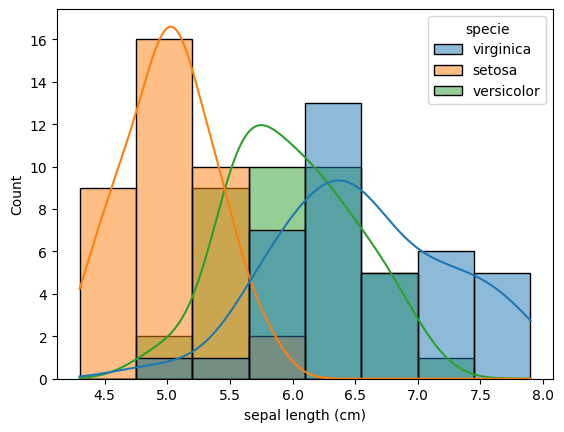

In [38]:
sns.histplot(data=df_data, x='sepal length (cm)', hue='specie', kde=True)

### Aufgabe 1.2 - `sns.stripplot`, `sns.violinplot`

1. Erstellen Sie einen `scatter plot` vom `Data-Set` (`df_data`) für das Feature `sepal width (cm)` und der Klasse `specie` mittels `sns.stripplot`. Der Plot heisst `stripplot` weil es die Datenpunkte vom `scatter plot` in einem Streifen (engl. `stirp`) anordnet. Würden wir das nicht machen, könnten wir die Menge der Punkte schlechter beurteilen.
2. Wiederholen Sie Schritt 1 für alle Features. Dies kann man mittels `for` Schleife (einfacher) oder mit einem `sns.PairGrid` (schwieriger) machen. Die Spalten des DataFrames kann man mit `df_data.columns` auslesen.
3. Interpretieren Sie den erstellten Plot.
4. Wiederholen Sie Schritt 2 mit dem `sns.violinplot`.
5. (Extra) Es gibt noch weitere interessante Plots wie der `sns.swarmplot` oder den `sns.boxplot`.
6. (Extra) Was ist der Unterschied von `sns.stripplot` und `sns.violinplot`?

#### Hilfreiche Links

* `sns.stripplot`: https://seaborn.pydata.org/generated/seaborn.stripplot.html
* `sns.violinplot`: https://seaborn.pydata.org/generated/seaborn.violinplot.html
* A complete guide to plotting categorical variables: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

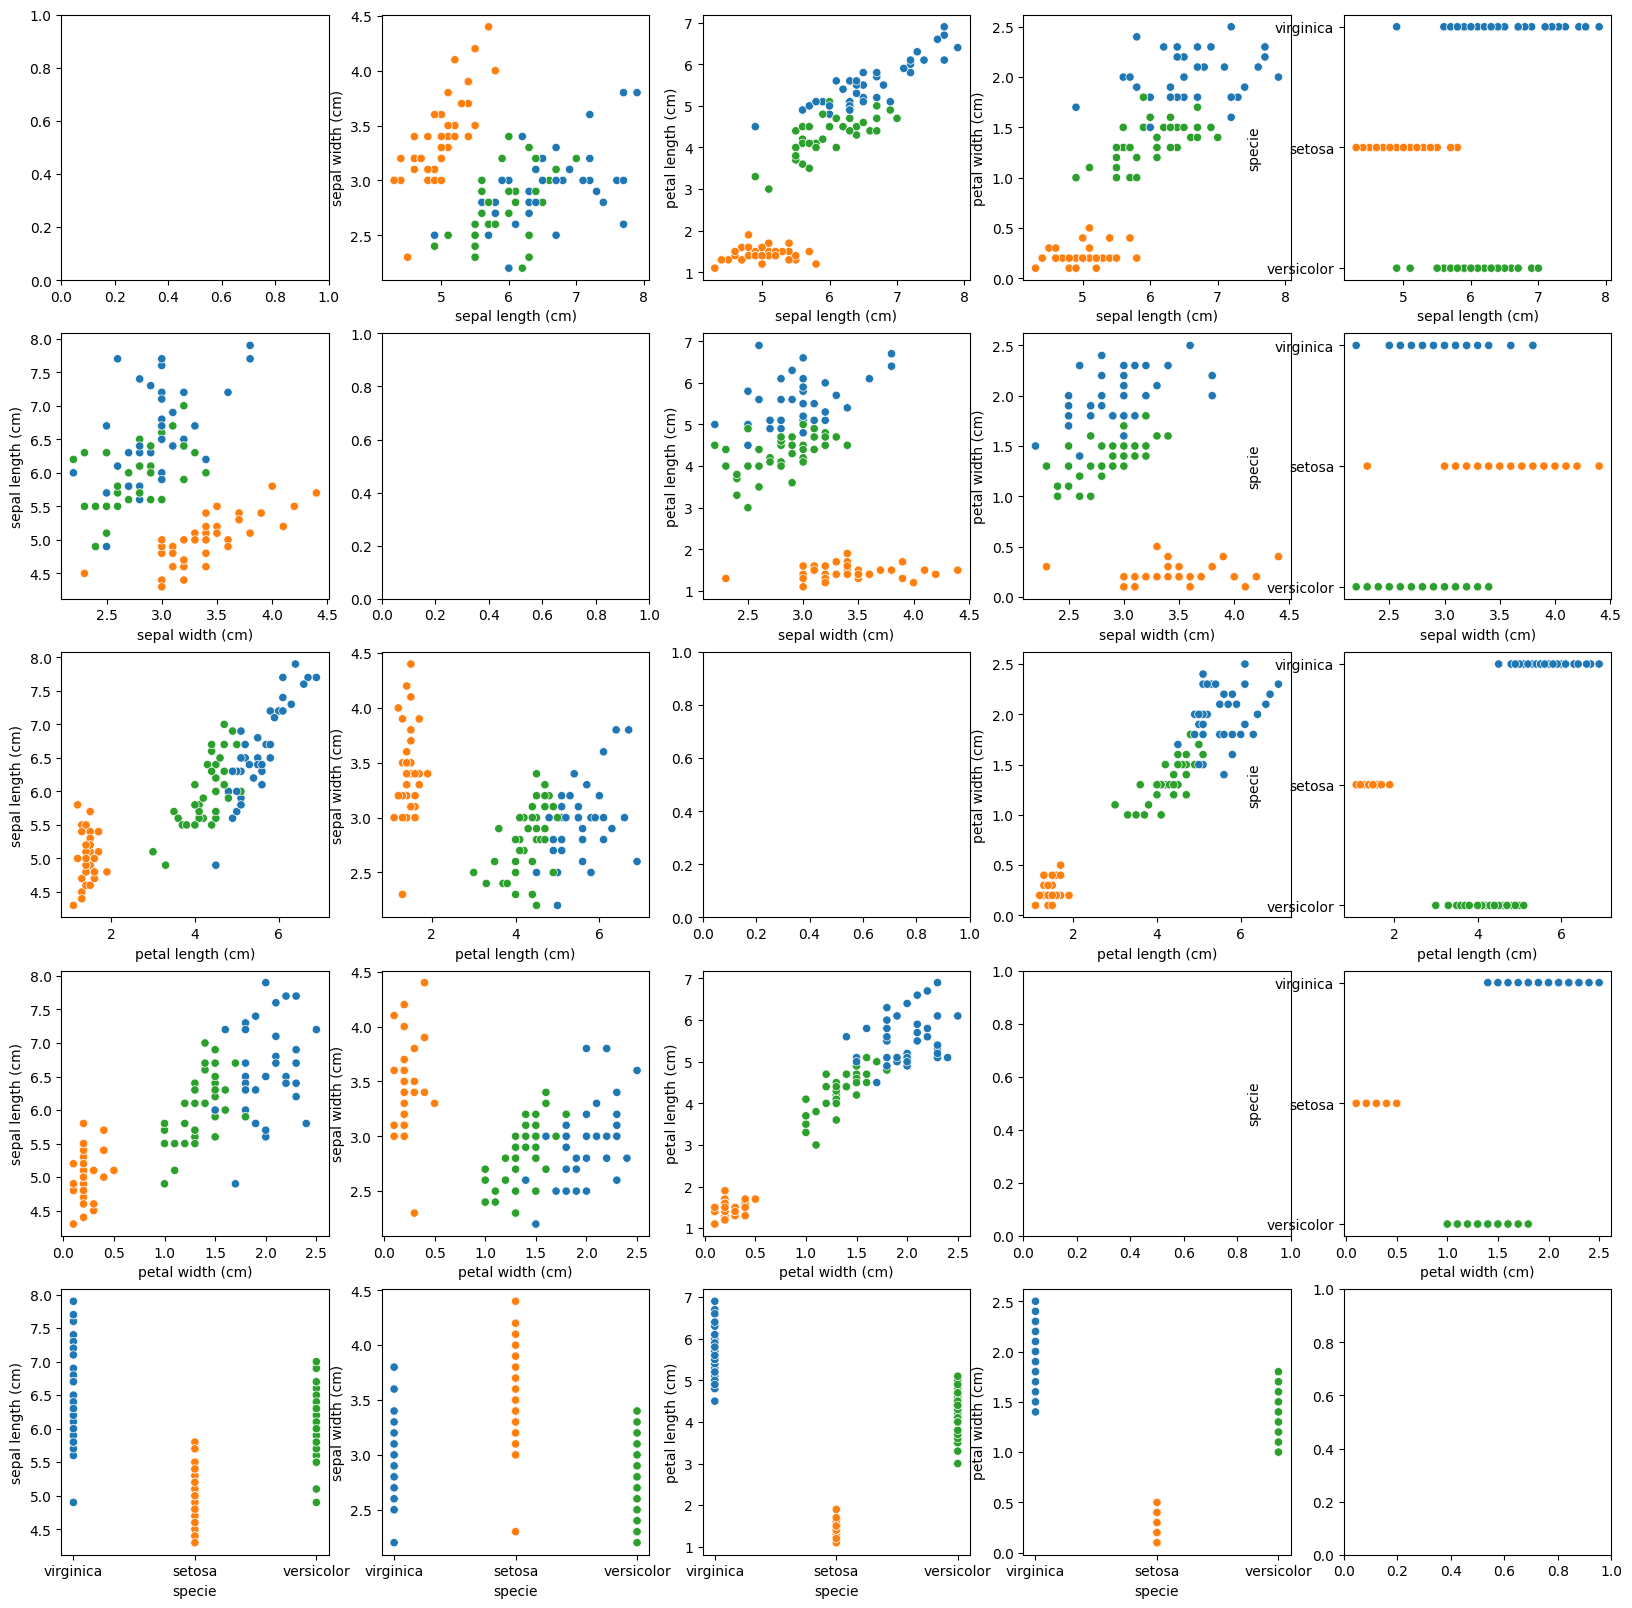

In [21]:
# create a figure and axis
column_len = df_data.columns.size
fig, axs = plt.subplots(column_len, column_len, figsize=(20, 20))

# plot each feature against each other
for column1 in df_data.columns:
    for column2 in df_data.columns:
        if (column1 == column2):
            continue
        sns.scatterplot(data=df_data, x=column1, y=column2, hue='specie', ax=axs[df_data.columns.get_loc(column1), df_data.columns.get_loc(column2)], legend=False)
        axs[df_data.columns.get_loc(column1), df_data.columns.get_loc(column2)].set_xlabel(column1)
        axs[df_data.columns.get_loc(column1), df_data.columns.get_loc(column2)].set_ylabel(column2)


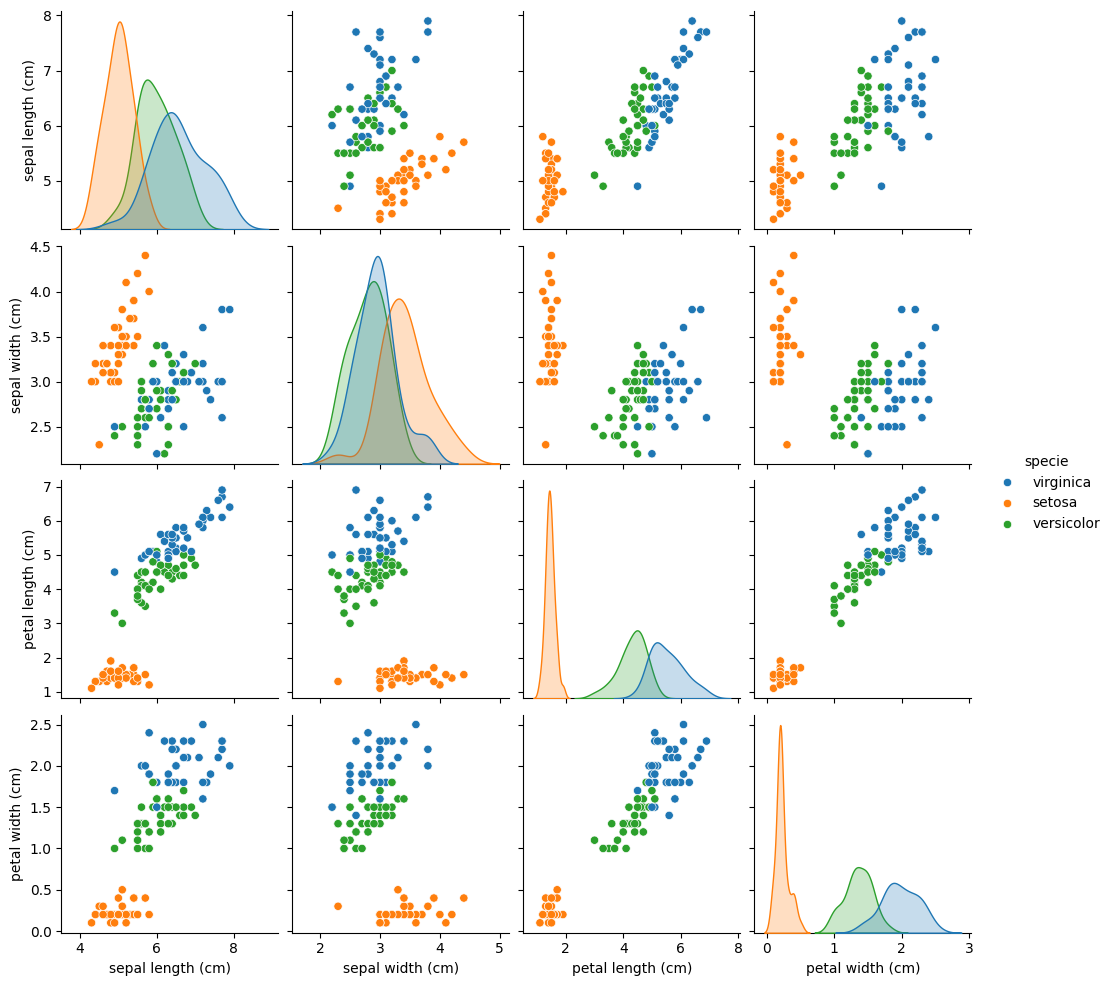

In [17]:
sns.pairplot(data=df_data, hue='specie')

### Schlusswort Aufgabe 1

Aufgabe 1 gibt Ihnen eine Idee der `Datenanalyse` für die `Classification`.
Wir haben ein verschiedene hilfreiche Plots, wie den `countplot`, den `stripplot` und den `violinplot`  gesehen.
Dies ist aber bei weitem nicht alles was man tun kann.
Wir haben in Aufgabe 1.2 alle Features unabhängig von einander angeschaut, man könnte die Feature Interaktionen bereits in der Datenanalyse untersuchen.

## Aufgabe 2 - Logistic Regression

In dieser Aufgabe erstellen wir unser erstes `Classification` Modell, ein `Logistic Regression` Modell.
Die `LogisticRegression` ist ein `Classification`-Modell und **kein** `Regression`-Modell, trotz des irreführenden Namens!

### Aufgabe 2.1 - Plot Features - `sns.scatterplot(..., hue='col')`

Wieder aus **didaktischen Gründen** (analog zu Aufgabenblatt 2) verwenden wir hier **lediglich 2 Features**, so können wir unsere Datenpunkte und trainierten Modelle 2-dimensional visualisieren.
Die X-Achse und Y-Achse sind jeweils die Features und die Farbe der Punkte (`hue`) ist das Label der Zielvariable.

Wir verwenden hier die Features `petal length (cm)` und `petal width (cm)`.

1. Visualisieren Sie die beiden Features `petal length (cm)` und `petal width (cm)` vom `Data-Set` (`df_data`) mittels `sns.scatterplot` und färben sie die Punkte mit dem `hue` Parameter nach der Zielvariable `specie` ein.
2. In Aufgabe 2.2 trainieren wir eine `LogisticRegression`, was genau wird dieses Modell schlussendlich machen? Überlegen Sie sich es am Plot aus Schritt 1.
3. (Extra) Was ist bei den Überlegungen aus Schritt 2 der Unterschied zur Regression?

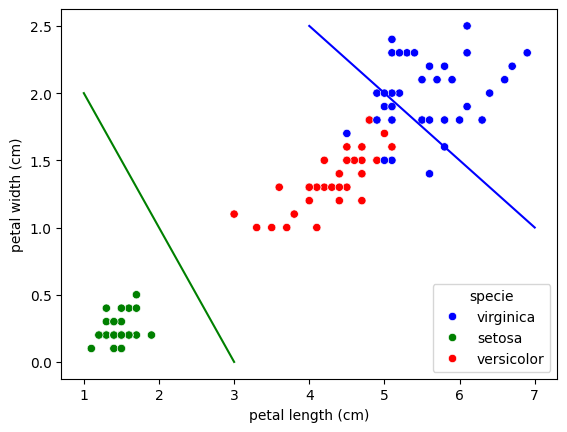

In [39]:
# 1
sns.scatterplot(data=df_data, x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)

# Diese Linien sind von Auge gesetzt, das Modell findet diese selbst.
plt.plot([1, 3], [2.0, 0.0], c='g')
plt.plot([4, 7], [2.5, 1.0], c='b')
plt.show()

### Aufgabe 2.2 - `sklearn.linear_model.LogisticRegression`

Analog zur `LinearRegression` vom Aufgabenblatt 2, trainieren wir hier die `LogisticRegression`.

1. Erstellen Sie eine `LogisticRegression` und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die Genauigkeit (englisch Accuracy) mittels `sklearn.metrics.accuracy_score` von `y_val_hat` unseren Vorhersagen und `y_val` den tatsächlichen `Klassen`.
4. Visualisieren Sie die `Decision Boundary` von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was zeigt dieser Plot?
5. (Extra) In `sklearn.metrics` gibt es weitere Metriken, manche haben wir im Theorie Teil kennengelernt, wie den F1-Score (`f1_score`). Schauen Sie sich den `classification_report` an (Sammlung von solchen Metriken) und interpretieren Sie diese Metriken.

In [40]:
from sklearn.linear_model import LogisticRegression

# 1 train
clf = LogisticRegression(max_iter=1000)
fitted_logistic_model = clf.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train)

# 2 get value
y_val_hat = clf.predict(X_val[['petal length (cm)', 'petal width (cm)']])

# 3 print accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_val_hat))

0.9642857142857143


Accuracy is ~ 96%. This means 96% of all data was correctly classified, only 4% was wrongly clustered in groups.

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

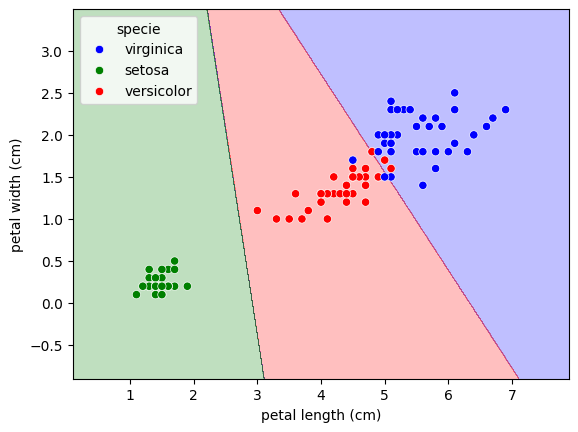

In [44]:
# 4 plot decision regions
plot_decision_regions(clf, df_data, 'petal length (cm)', 'petal width (cm)', colors)

# plot data in
sns.scatterplot(data=df_data, x='petal length (cm)', y='petal width (cm)', hue='specie', palette=colors)

In [45]:
# 5. classification_report classification report data
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_hat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.90      0.95        10

    accuracy                           0.96        28
   macro avg       0.97      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



### Aufgabe 2.3 - Confusion Matrix

In Aufgabe 2.2 haben wir ein Modell trainiert und die Genauigkeit gemessen.
Oft ist es aber interessant, wo genau das Modell die Fehler macht.
In der `Classification` bedeutet ein Fehler nämlich immer, dass wir einen Datenpunkt einer falschen `Klasse` zuordnen.
Dafür haben wir im Theorie Teil die `Confusion Matrix` kennengelernt.

Die Berechnung `Confusion Matrix` müssen wir nicht selbst programmieren, `sklearn` bietet bereits eine Implementierung dafür.

1. Erstellen Sie mittels `sklearn.metrics.confusion_matrix` den Vorhersagen `y_val_hat` von Aufgabe 2.2 und den richtigen Labels `y_val` die `Confusion Matrix` auf dem `Validation-Set` und interpretieren Sie die `Confusion Matrix`.

In [ ]:
from sklearn.metrics import confusion_matrix

# TODO

### (Extra) Aufgabe 2.4 - Was wurde gelernt?

Die `Logistische Regression` hat folgende Form:

$
\begin{aligned}
    \phi(x^{(i)}\beta) = \phi(\beta_0 + x_1 \beta_1 + \cdots + x_p \beta_p)
\end{aligned}
$

Dies ist einfach die `Lineare Regression` mit der Sigma-Funktion $\phi$ als `Linker-Funktion`.

Da wir nur zur Zeit nur zwei Features haben, vereinfacht sich das zu:

$
\begin{aligned}
    \phi(x^{(i)}\beta) = \phi(\beta_0 + x_1 \beta_1 + x_2 \beta_2)
\end{aligned}
$

Analog zum Aufgabenblatt 2 können wir auch nachschauen, welche $\beta$s (Gewichte) gelernt wurden.

In [ ]:
print("beta0", clf.intercept_)
print("beta1", clf.coef_[:, 0])
print("beta2", clf.coef_[:, 1])

Es wurden drei verschiedene $\beta_0$, $\beta_1$ und $\beta_2$ gelernt!

1\.
Warum ist das? Was bedeutet das?

In [ ]:
# TODO

### Schlusswort Aufgabe 2

In Aufgabe 2 haben wir unser erstes `Classification` Modell, eine `Logistische Regression`, angewandt.
In den nächsten Aufgaben werden wir weitere `Classification` Modelle anwenden.

Für die Auswertung unseres Modelles nutzten wir `Classification` Metriken, wie die `Genauigkeit` (Accuracy) 
und die `Confusion Matrix`.
Diese Auswertungen können wir genau gleich wieder bei anderen Modellen anwenden.

Der Iris-Datensatz ist bereits **linear gut separierbar**, mit nur 2 Featuren und ohne `Feature Engineering` und ohne nicht-lineare Modelle.
Obwohl der Datensatz (zu) einfach ist bleiben wir auch für die weiteren Aufgaben auf dem Iris-Datensatz.
Es geht in den weiteren Aufgaben mehr um die Visualisierungen der Modelle, sowie dem Verständnis wie sie sich unterscheiden.

## Aufgabe 3 - Support Vector Machine

In Aufgabe 3 wenden wir `Support Vector Machinen` für die `Classification` an (`sklearn.svm.SVC`).
`Support Vector Machinen` könnten auch für die Regression benutzt werden (`sklearn.svm.SVR`), daher der Name `SVC` im `sklearn`.

### Aufgabe 3.1 - Linear Support Vector Machine

Analog zur Aufgabe 2.2 trainieren wir unser Modell vorerst auf 2 Featuren: `petal length (cm)` und `petal width (cm)`.

1. Erstellen Sie eine `sklearn.svm.SVC` mit dem linearen Kernel (`kernel='linear'`) und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die Genauigkeit (englisch Accuracy) mittels `sklearn.metrics.accuracy_score` von unseren Vorhersagen `y_val_hat` und den tatsächlichen Labels `y_val`.
4. Visualisieren Sie die decision boundary von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was zeigt dieser Plot?

In [ ]:
# TODO

### Aufgabe 3.2 - Logistische Regression oder Support Vector Machine

Im theoretischen Teil haben wir gesehen, wie die `Logistische Regression` und wie die `Support Vector Machine` hinter den Kullisen (innerhalb der `fit` Methode) trainiert werden.
Nutzen Sie Ihr Wissen in folgender Aufgabe.

Unten sehen Sie zwei Visualisierungen der `Decision Regions` von Aufgabe 2.2 und Aufgabe 3.1 

Logistische Regression     |  Support Vector Machine
:-------------------------:|:-------------------------:
![Logistische Regression oder SVM?](./img/lr_or_svm_2.png) |  ![Logistische Regression oder SVM?](./img/lr_or_svm_1.png)  

1. Woran man das das zugrundeliegende Modell anhand der `Decision Regions` erkennen?

In [ ]:
# TODO

### Aufgabe 3.3 - Support Vector Machine - Kernel Trick - Nicht Lineares Modell

Im theoretischen Teil haben wir den `Kernel Trick` erwähnt, den wir in der `Support Vector Machine` anwenden können, um ein nicht lineares Modell zu erhalten. Generell kann man diesen Trick in verschiedenen Modellen einsetzen (Lineare Regression, Logistische Regression, KNN, ...), er ist jedoch nur bei `Support Vector Machine` out-of-the-box in sklearn verfügbar.

Welcher Kernel wir verwenden und welche Parameter wir für einen spezifischen Kernel verwenden sind `Hyper-Parameter` vom `Support Vector Machine` Modell.

Wir können diese `Hyper-Parameter` manuell (mit Expertenwissen) setzen oder systematisch (mit `Hyper-Parameter Optimization` (Aufgabe 3.4)) finden.

1. Erstellen Sie eine `sklearn.svm.SVC` mit dem `rbf` Kernel (`kernel='rbf'`) und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die `Accuracy` mittels `sklearn.metrics.accuracy_score` von unseren Vorhersagen `y_val_hat` und den tatsächlichen Labels `y_val`.
4. Visualisieren Sie die `Decision Boundary` von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was ist grundlegend anders als in der Visualisierung der `linearen Support Vector Machine` von Aufgabe 3.2?

In [ ]:
# TODO

### Aufgabe 3.4 - Support Vector Machine - Alle Features und Hyper-Parameter Optimization

Nun möchten wir alle Features verwenden und den Hyper-Parameter `gamma` vom `rbf` Kernel mittels `Hyper-Parameter Optimierung` finden.

Dazu können wir unterschiedliche Such-Strategien verwenden:
* `Grid Search`: Systematisch ein Grid absuchen
* `Randomized Search`: `n` Mal zufälle Parameter in einem fixen Bereich ausprobieren

Wir verwenden hier `Randomized Search`, da es in der Praxis erstaunlich oft gut funktioniert.
`sklearn` bietet bereits eine Implementierung mit `Cross Validation` für stabilere Aussagen für die einzelnen Parameter bereit namens `RandomizedSearchCV`.

1. Erstellen Sie einen fixen Bereich für den `gamma` Parameter, analog zu diesem Beispiel.
2. Erstellen Sie eine `RandomizedSearchCV` mit einer `SVC(kernel='rbf')`, dem in Schritt 1 erstellten fixen Bereich. Wählen Sie eine sinnvolle Anzahl an Iterationen (z.B. `n_iter=25`).
3. Trainieren `fit` Sie die `RandomizedSearchCV` auf dem `Data-Set` (`X_data` `y_data`).
4. Warum nehmen wir in Schritt 3 das `Data-Set` und nicht das `Train-Set`?
5. Welches Hyper-Parameter wurden gefunden (hier `gamma`)? Verwenden Sie dazu `rscv.best_params_`.

In [ ]:
# TODO

## (Extra) Aufgabe 4 - Weitere Modelle

Analog zur Aufgabe 2.2 (Logistische Regression) und Aufgabe 3.1 (Support Vector Machine), trainieren wir hier andere Classification-Modelle, um ein Gefühl für den Unterschied zu bekommen.

### (Extra) Aufgabe 4.1 - RandomForestClassifier

1. Erstellen Sie eine `sklearn.ensemble.RandomForestClassifier` und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die Genauigkeit (englisch Accuracy) mittels `sklearn.metrics.accuracy_score` von unseren Vorhersagen `y_val_hat` und den tatsächlichen Labels `y_val`.
4. Visualisieren Sie die decision boundary von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was zeigt dieser Plot?

In [ ]:
# TODO

### (Extra) Aufgabe 4.2 - KNN (K-Nearest-Neighbors)

1. Erstellen Sie eine `sklearn.neighbors.KNeighborsClassifier` und trainieren Sie diese auf den Features `petal length (cm)` und `petal width (cm)` vom `Train-Set` (`X_train`, `y_train`).
2. Predicten (`clf.predict`) Sie die Vorhersagen auf dem `Validation-Set` (`X_val`). Hier müssen Sie wieder die entsprechenden Features selektieren.
3. Messen Sie die Genauigkeit (englisch Accuracy) mittels `sklearn.metrics.accuracy_score` von unseren Vorhersagen `y_val_hat` und den tatsächlichen Labels `y_val`.
4. Visualisieren Sie die decision boundary von unserem Modell mit der Hilfe von der oben definierten `plot_decision_regions` Funktion. Was zeigt dieser Plot?

In [ ]:
# TODO

## Aufgabe 5 - Test Set

Im Setup haben wir das `Test-Set` (`X_test`, `y_test`) erstellt und beiseite gelegt. Nun wollen wir das gefundene Modell auf diesem `Test-Set` evaluieren.

1. Nehmen Sie ein Modell aus einer vorherigen Aufgabe als finales Modell.
2. Wenden Sie dieses Modell auf dem `Test-Set` (`X_test`, `y_test`) an. `X_test` muss allenfalls noch entsprechend verarbeitet werden.
3. Bestimmen Sie die Genauigkeit auf den Vorhersagen von Schritt 2 und `y_test`.

In [ ]:
# TODO

## Schlusswort Aufgabenblatt 3

Im Aufgabenblatt 3 haben wir die `Classification` genauer angeschaut.
Wir haben verschiedene Plots für die `Datenanalyse`, verschiedene `Metriken` und verschiedene Modelle angeschaut.
Es ist vorallem wichtig, dass Sie ein erstes Gefühl für die `Classification` bekommen haben und die Unterschiede zur Regression (Aufgabenblatt 2) klar verstehen.

Der verwendete Iris-Datensatz ist ein oft verwendeter erster Datensatz. In der Praxis hat man oft schwierigere Datensätze, dass man eine Genauigkeit von 100% erreicht ist eher unüblich und je nach Problem unmöglich.